In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy
import talib

from tqdm.notebook import tqdm
plt.rcParams["figure.figsize"] = (20, 10)

# BitMEX API [Docs](https://docs.bitmex.com/api-explorer/get-trade-bucketed)

Lets fetch some historical OHLC data

In [2]:
sym = 'ETHUSD'

url = f'https://www.bitmex.com/api/v1/trade/bucketed?binSize=1h&partial=true&symbol={sym}&count=1000&reverse=true'

data = requests.get(url).json()

rows = []
rows.extend(data)

i = 0

while i < 10:
    endtime = data[-1]['timestamp']
    data = requests.get(url + f'&endTime={endtime}').json()
    rows.extend(data)
    i += 1


cf = pd.DataFrame(rows)
cf = cf.sort_values('timestamp').drop_duplicates().reset_index(drop=True)

logret = np.log(cf['close'].shift(-1)) - np.log(cf['close'])

cf['logret'] = logret
cf['abs_logret'] = abs(logret)

cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
0,2024-06-11T20:00:00.000Z,ETHUSD,3489.40,3503.75,3480.00,3497.70,531,4845,3490.82,1.0,1691298460,325.747019,1.137125e+06,-0.002519,0.002519
1,2024-06-11T21:00:00.000Z,ETHUSD,3497.70,3499.65,3485.20,3488.90,351,2532,3490.30,4.0,883741690,170.347881,5.945644e+05,0.004176,0.004176
2,2024-06-11T22:00:00.000Z,ETHUSD,3488.90,3504.55,3487.85,3503.50,245,2442,3495.33,3.0,853556475,164.312737,5.743254e+05,-0.000071,0.000071
3,2024-06-11T23:00:00.000Z,ETHUSD,3503.50,3509.95,3497.95,3503.25,333,2754,3503.88,5.0,964966455,185.679581,6.505981e+05,-0.001100,0.001100
4,2024-06-12T00:00:00.000Z,ETHUSD,3503.25,3510.70,3494.50,3499.40,334,4693,3501.06,5.0,1643041465,316.286224,1.107334e+06,-0.001029,0.001029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10985,2025-09-12T13:00:00.000Z,ETHUSD,4520.54,4530.36,4505.11,4526.74,439,1504,4515.52,2.0,679132428,172.895649,7.807125e+05,0.002687,0.002687
10986,2025-09-12T14:00:00.000Z,ETHUSD,4526.74,4545.00,4507.66,4538.92,388,1474,4525.25,3.0,667020767,169.596560,7.674670e+05,0.002082,0.002082
10987,2025-09-12T15:00:00.000Z,ETHUSD,4538.92,4572.58,4526.83,4548.38,1150,4539,4553.07,4.0,2066634409,523.148644,2.381934e+06,-0.001340,0.001340
10988,2025-09-12T16:00:00.000Z,ETHUSD,4548.38,4552.16,4529.59,4542.29,337,1898,4541.07,27.0,861893012,218.590622,9.926337e+05,0.003983,0.003983


<Axes: ylabel='Frequency'>

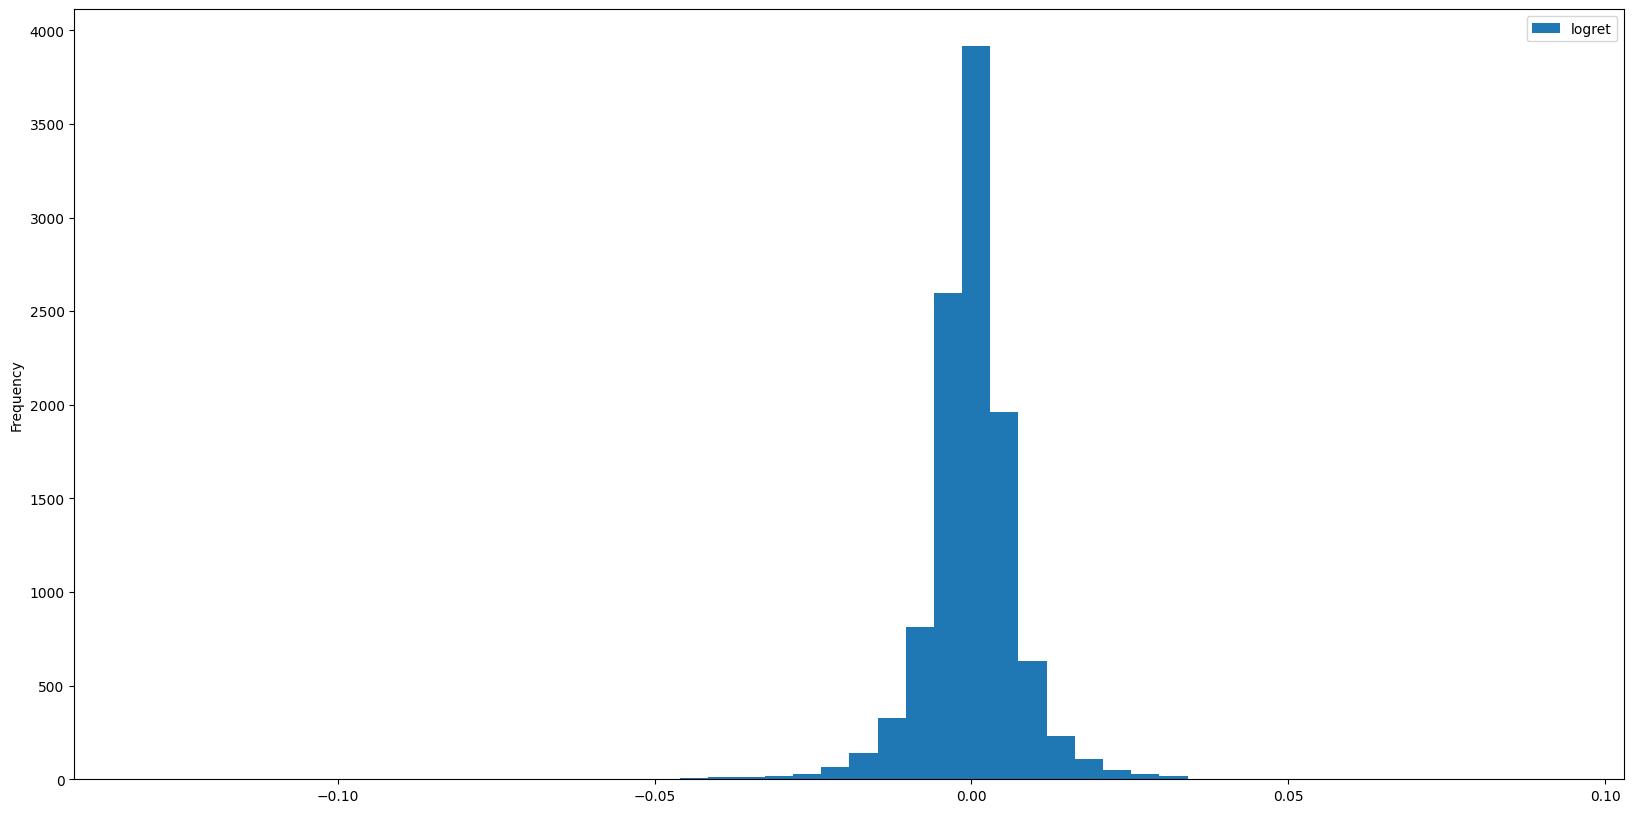

In [7]:
cf.plot(y='logret', kind='hist', bins=50)

In [8]:
cf.sort_values('abs_logret', ascending=False)

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
5669,2025-02-03T01:00:00.000Z,ETHUSD,2872.75,2873.08,2772.08,2828.26,2976,39420,2824.10,4.0,11132545074,3805.327948,1.074693e+07,-0.130460,0.130460
6332,2025-03-02T16:00:00.000Z,ETHUSD,2196.98,2292.93,2197.41,2231.74,6560,61441,2249.09,1.0,13818553133,5349.948275,1.203353e+07,0.091922,0.091922
1301,2024-08-05T01:00:00.000Z,ETHUSD,2689.26,2697.61,2483.62,2528.40,4280,121696,2597.65,4.0,31612191282,6914.531829,1.796611e+07,-0.085834,0.085834
7245,2025-04-09T17:00:00.000Z,ETHUSD,1485.83,1508.81,1483.18,1502.98,627,6752,1500.02,4.0,1012808585,525.182854,7.877881e+05,0.084609,0.084609
7186,2025-04-07T06:00:00.000Z,ETHUSD,1548.40,1561.67,1536.50,1540.42,1865,35462,1546.19,3.0,5483059426,2728.106194,4.218170e+06,-0.073870,0.073870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,2025-06-14T03:00:00.000Z,ETHUSD,2560.36,2561.15,2561.15,2561.15,1,1,2561.15,1.0,256115,0.105485,2.701635e+02,0.000000,0.000000
6854,2025-03-24T10:00:00.000Z,ETHUSD,2092.86,2096.95,2087.02,2095.72,836,4332,2091.73,1.0,906134042,378.057227,7.907907e+05,0.000000,0.000000
8916,2025-06-18T08:00:00.000Z,ETHUSD,2526.85,2535.78,2520.14,2535.09,297,2589,2527.65,1.0,654405658,271.668312,6.866796e+05,0.000000,0.000000
2239,2024-09-13T03:00:00.000Z,ETHUSD,2360.58,2363.78,2357.05,2359.54,147,2104,2360.01,5.0,496544017,122.256790,2.885261e+05,0.000000,0.000000


<Axes: xlabel='timestamp'>

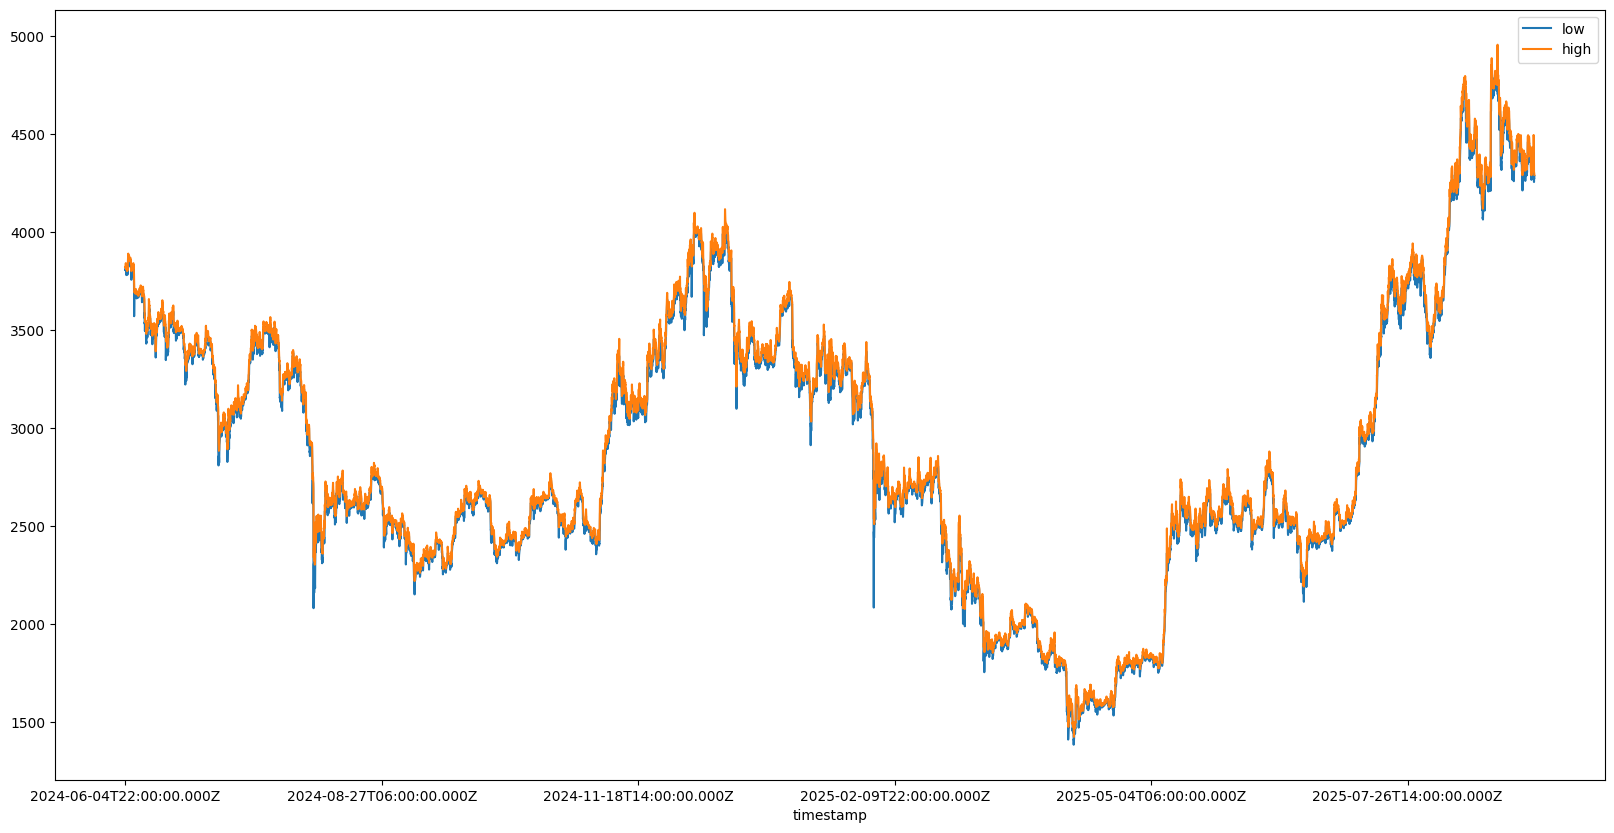

In [71]:
cf.plot(x='timestamp', y=['low', 'high'])

In [11]:
cf['rsi'] = talib.RSI(cf['close'])

In [36]:
xf = cf[['timestamp', 'close', 'volume', 'rsi', 'logret']].dropna()
R = xf['logret'].tolist()

n = 2

R = [R[i:i+n] for i in range(len(R))]
R = [sum(x) if len(x) == n else np.nan for x in R]
xf['futret'] = R

xf

,timestamp,close,volume,rsi,logret,futret
14,2024-06-12T10:00:00.000Z,3541.15,5415,66.255144,0.001256,-0.002049
15,2024-06-12T11:00:00.000Z,3545.60,10314,67.423253,-0.003305,0.026386
16,2024-06-12T12:00:00.000Z,3533.90,10426,61.404752,0.029691,0.023644
17,2024-06-12T13:00:00.000Z,3640.40,82990,79.416289,-0.006048,-0.000659
18,2024-06-12T14:00:00.000Z,3618.45,33106,71.962256,0.005388,0.000939
...,...,...,...,...,...,...
10984,2025-09-12T12:00:00.000Z,4520.54,1272,62.531067,0.001371,0.004058
10985,2025-09-12T13:00:00.000Z,4526.74,1504,63.876505,0.002687,0.004769
10986,2025-09-12T14:00:00.000Z,4538.92,1474,66.426991,0.002082,0.000742
10987,2025-09-12T15:00:00.000Z,4548.38,4539,68.299109,-0.001340,0.002644


In [37]:
# xf.plot(x='rsi', y='futret', kind='scatter')

,grsi,up,count,prob_up
0,2.5,0,0,NaN
1,7.5,3,6,0.500000
2,12.5,12,26,0.461538
3,17.5,32,66,0.484848
4,22.5,81,153,0.529412
5,27.5,149,301,0.495017
6,32.5,271,469,0.577825
7,37.5,502,891,0.563412
8,42.5,805,1475,0.545763
9,47.5,951,1790,0.531285


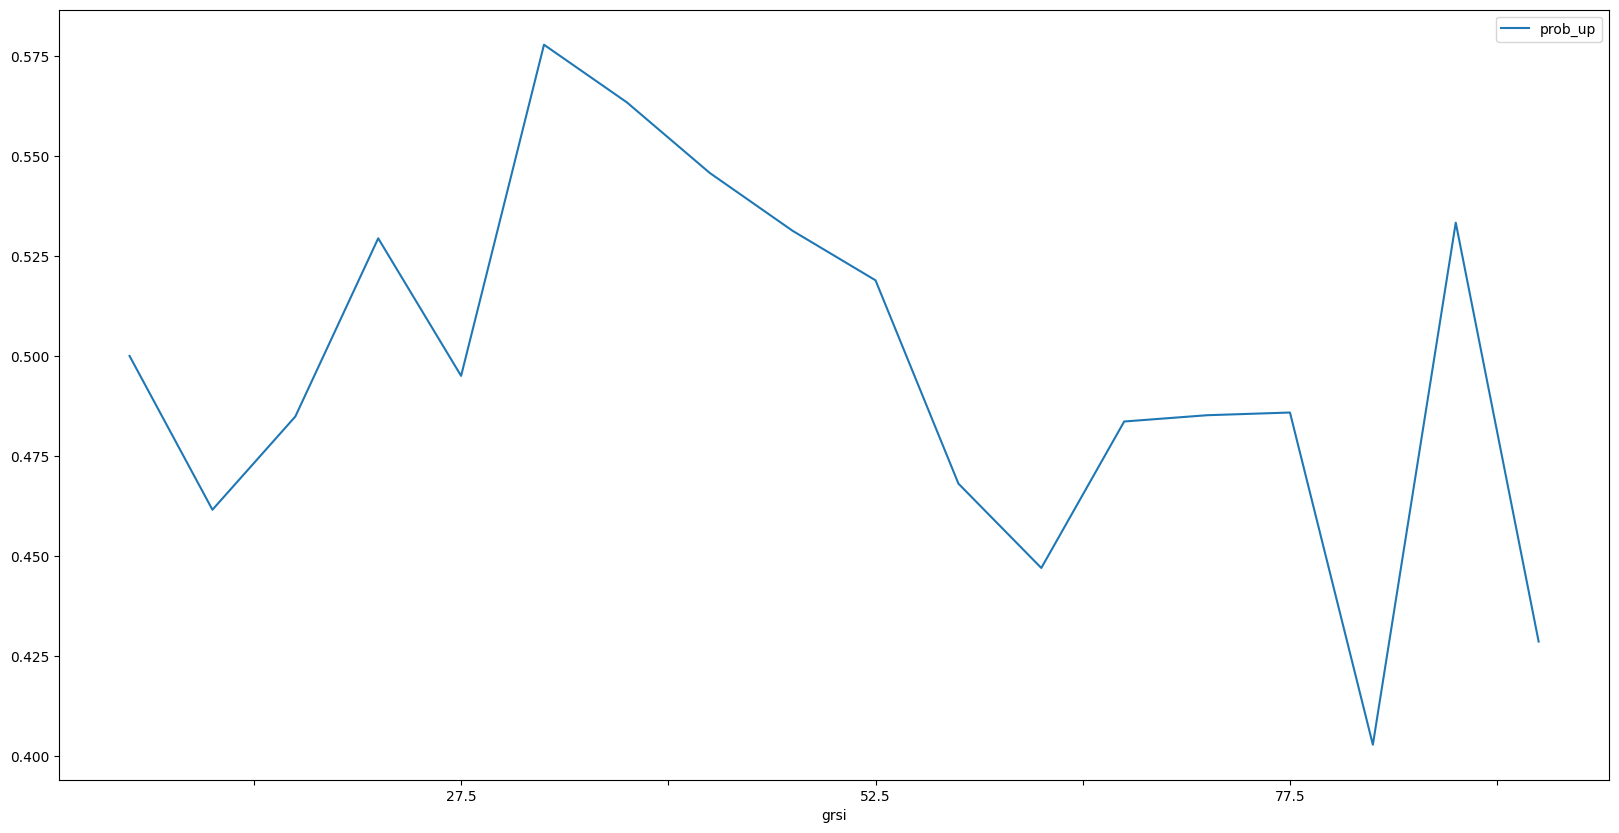

In [38]:
xf['grsi'] = pd.cut(xf['rsi'], np.arange(0, 101, 5)).apply(lambda x: x.mid)

xf['up'] = xf['futret'].apply(lambda x: 1 if x > 0 else 0)

yf = xf.groupby('grsi').agg({'up': sum, 'rsi': len}).reset_index()

yf.columns = ['grsi', 'up', 'count']
yf['prob_up'] = yf['up'] / yf['count']

yf.plot(x='grsi', y='prob_up')
yf

In [40]:
(1 - 0.577825) / 2

0.21108749999999998

<Axes: >

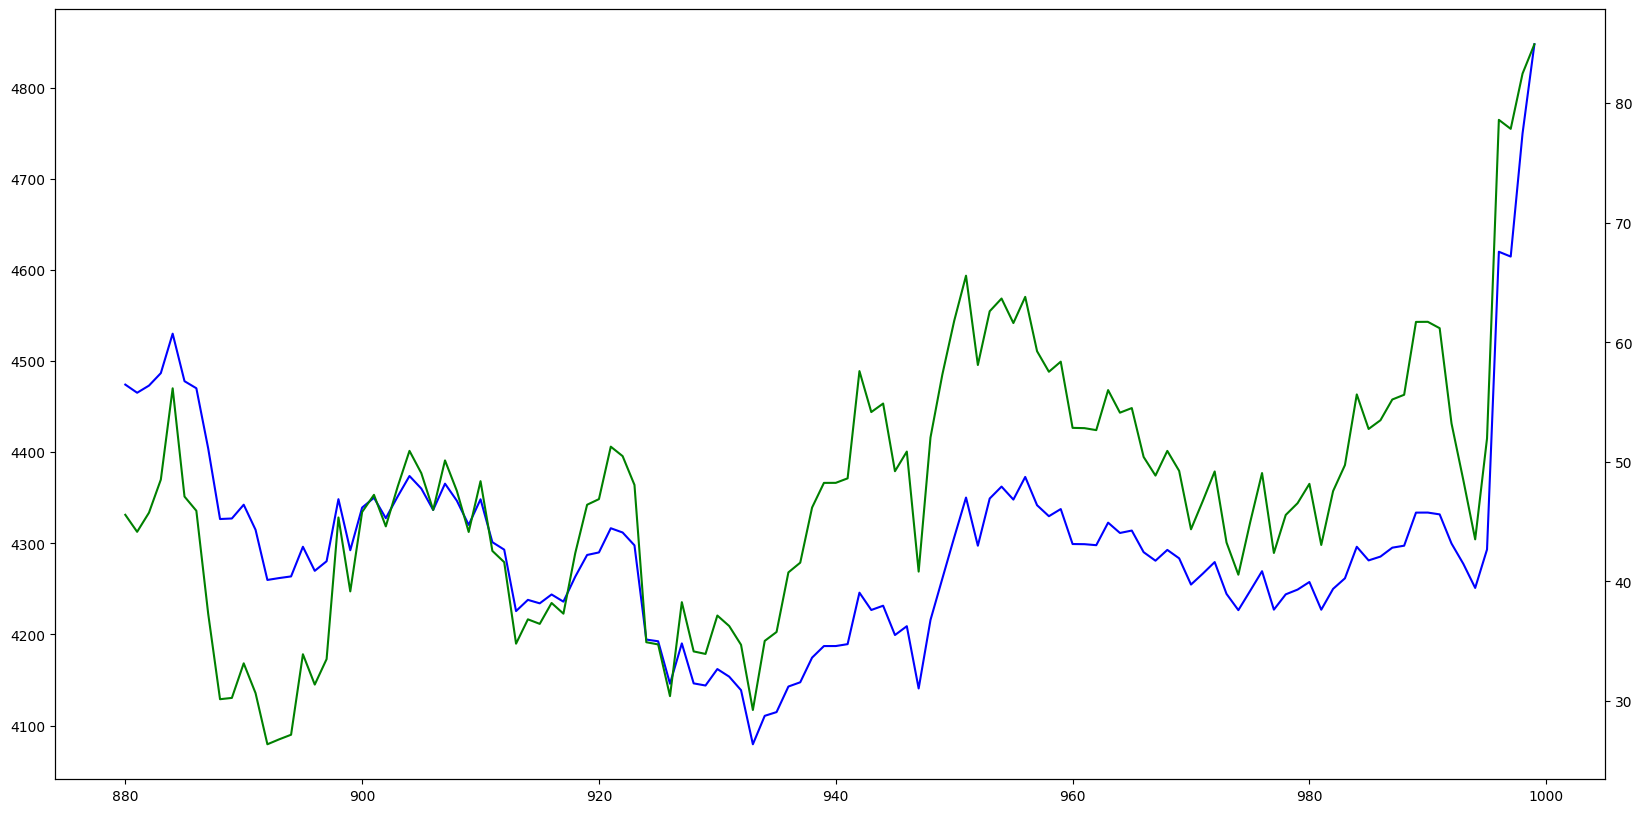

In [56]:
fig, ax1 = plt.subplots()

N = 120

ax2 = ax1.twinx()

cf['close'][-N:].plot(ax=ax1, style='b-')

cf['rsi'][-N:].plot(ax=ax2, style='g-')

In [57]:
cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret,rsi
0,2025-07-12T03:00:00.000Z,ETHUSD,2960.46,2973.00,2956.05,2958.59,1893,2920,2965.64,1,865964309,343.772743,1.019504e+06,0.003243,0.003243,NaN
1,2025-07-12T04:00:00.000Z,ETHUSD,2958.59,2970.64,2957.35,2968.20,1339,1940,2964.38,1,575088616,228.467346,6.772631e+05,-0.004911,0.004911,NaN
2,2025-07-12T05:00:00.000Z,ETHUSD,2968.20,2970.67,2943.68,2953.66,1293,5936,2954.36,3,1753703001,698.959339,2.064974e+06,0.000454,0.000454,NaN
3,2025-07-12T06:00:00.000Z,ETHUSD,2953.66,2959.90,2945.44,2955.00,588,1913,2952.95,1,564896617,225.120072,6.647654e+05,0.002923,0.002923,NaN
4,2025-07-12T07:00:00.000Z,ETHUSD,2955.00,2965.00,2948.16,2963.65,450,1858,2955.19,1,549072877,218.978563,6.471223e+05,0.000354,0.000354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-08-22T14:00:00.000Z,ETHUSD,4251.03,4323.88,4237.84,4293.27,1147,6154,4286.80,1,2638090221,691.460487,2.964169e+06,0.073340,0.073340,51.963409
996,2025-08-22T15:00:00.000Z,ETHUSD,4293.27,4651.61,4295.91,4619.97,4514,38141,4527.00,1,17266386484,4374.741219,1.980735e+07,-0.001146,0.001146,78.598827
997,2025-08-22T16:00:00.000Z,ETHUSD,4619.97,4672.93,4614.68,4614.68,1187,9564,4651.42,7,4448604149,1115.618454,5.189195e+06,0.028868,0.028868,77.846138
998,2025-08-22T17:00:00.000Z,ETHUSD,4614.68,4783.67,4620.81,4749.84,1708,17704,4732.69,27,8378739984,2063.136011,9.764154e+06,0.020385,0.020385,82.466242


## Looking into [Kelly Criterion](https://en.wikipedia.org/wiki/Kelly_criterion)

<Axes: ylabel='Frequency'>

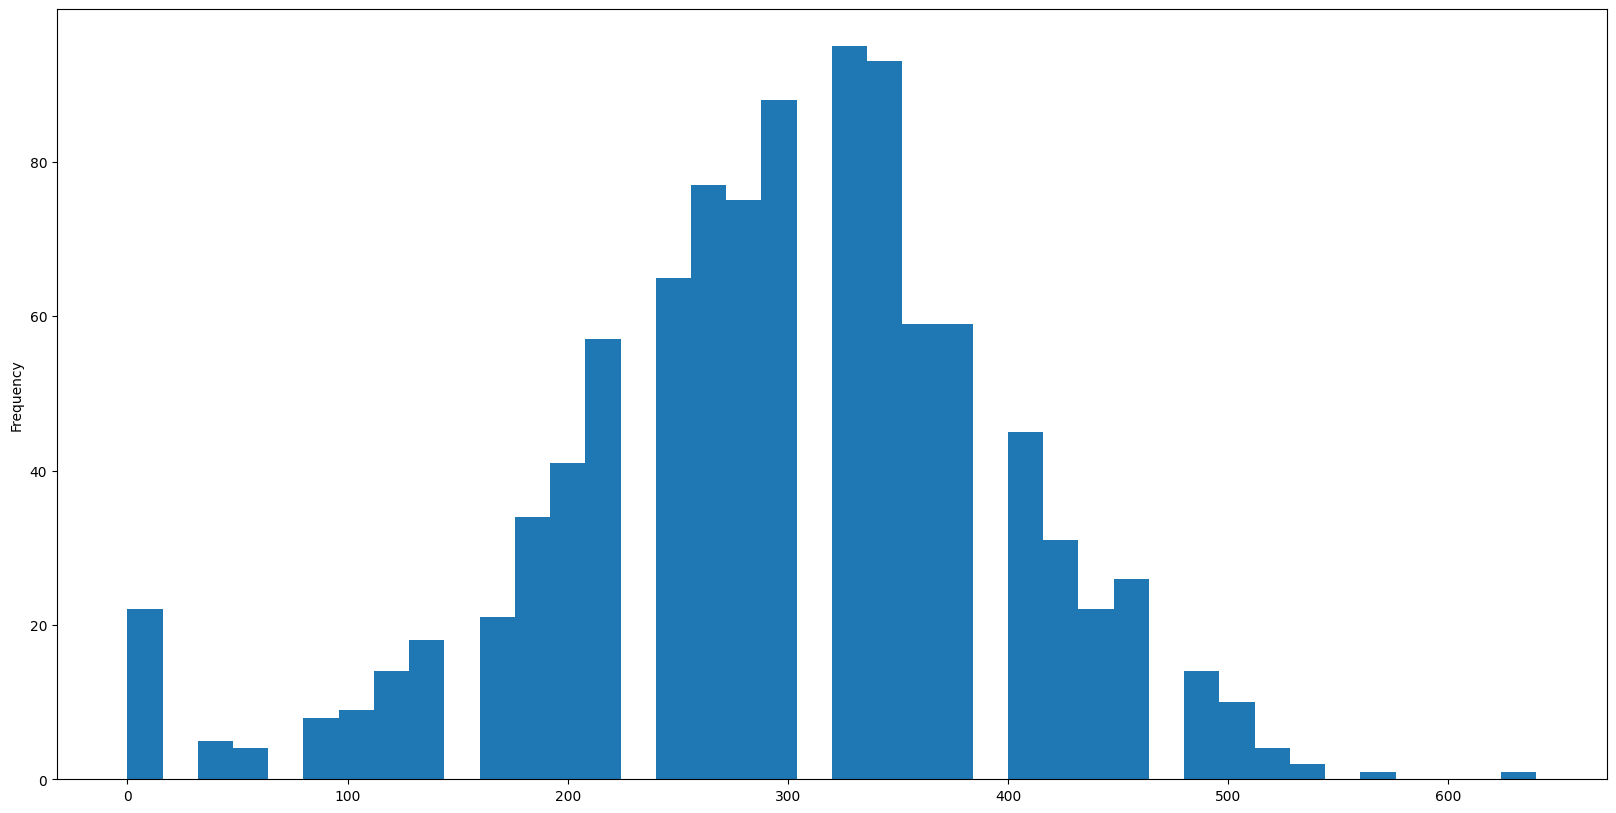

In [61]:
import random

coinflip = lambda: -1 if random.random() > 0.6 else 1

def trial(bets, bs):
    pot = 100
    n = 0
    while n < bets:
        pot += min(pot, bs) * coinflip()
        n += 1
        if pot <= 0: 
            break
    return pot
  

def trials_mcs(bs):
    return [trial(100, bs) for _ in range(1000)]


tf = pd.DataFrame(trials_mcs(10))
tf['count'] = 1
tf.columns = ['pot', 'count']

tf['pot'].plot(kind='hist', bins=40)
